# Importing Packages

In [23]:
import numpy as np #used to import mathematical operations
import matplotlib.pyplot as plt #used to plot different things in python
import pandas as pd #import data sets and manage data sets

# Data Exploration

In [24]:
dataset = pd.read_csv('para_data_train_shuffle.csv')

In [25]:
dataset.head()

,os,alg,pc,se,cn,m,cs,hackathons,certificaions_app development,certificaions_full stack,...,SelfCapabilities_No,SelfCapabilities_Yes,Management/Technical_Management,Management/Technical_Technical,Job_Business Intelligence Analyst,Job_Database Administrator,Job_Project Manager,Job_Security Administrator,Job_Software Developer,Job_Technical Support
0,-0.949977,0.936632,0.354208,0.540938,-0.534963,0.703096,0.781412,-0.144352,0,0,...,0,1,1,0,1,0,0,0,0,0
1,1.355113,-1.501703,-0.616225,-0.469356,0.843180,0.012219,0.925483,-1.325307,0,0,...,0,1,0,1,0,0,0,0,0,1
2,1.558503,-1.772629,-1.240076,-0.738767,0.567551,0.357658,-0.155043,-0.734830,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1.422910,-1.637166,1.116692,0.204174,1.807880,0.979447,-0.515219,0.446125,0,0,...,1,0,0,1,0,0,0,1,0,0
4,0.744942,0.191585,-0.338959,-1.479649,-1.224034,-0.540482,0.781412,-0.144352,0,0,...,1,0,1,0,0,1,0,0,0,0


# Feature Selection for training and testing Datas

In [26]:
X_train = dataset.iloc[: , :38].values  #independant variable vector

In [27]:
Y_train = dataset.iloc[: , 38:].values

In [28]:
dataset1 = pd.read_csv('para_data_test_shuffle.csv')

In [36]:
dataset1.head()

,os,alg,pc,se,cn,m,cs,hackathons,certificaions_app development,certificaions_full stack,...,SelfCapabilities_No,SelfCapabilities_Yes,Management/Technical_Management,Management/Technical_Technical,Job_Business Intelligence Analyst,Job_Database Administrator,Job_Project Manager,Job_Security Administrator,Job_Software Developer,Job_Technical Support
0,-1.899132,-1.298508,0.146258,0.271527,0.429737,-0.056868,0.709377,0.446125,0,1,...,1,0,1,0,0,0,1,0,0,0
1,-1.695742,1.410753,-0.962809,1.147115,-1.017313,0.979447,0.565307,-0.144352,0,0,...,0,1,1,0,1,0,0,0,0,0
2,-1.627945,1.004364,0.492842,0.810350,0.154108,1.670325,0.421237,-0.734830,0,0,...,0,1,1,0,1,0,0,0,0,0
3,1.558503,0.394780,0.284892,-0.738767,-0.328241,-1.438623,-0.227079,-0.734830,0,0,...,1,0,1,0,0,1,0,0,0,0
4,-0.068619,1.410753,-1.517343,-0.671414,-1.361848,-0.471395,-0.155043,0.446125,0,0,...,1,0,1,0,0,1,0,0,0,0


In [29]:
X_test = dataset1.iloc[: , :38].values  #independant variable vector

In [30]:
Y_test = dataset1.iloc[: , 38:].values

# Data Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Neural Network - CNN

In [32]:
from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import seaborn as sns

In [33]:
model = Sequential()
layers = 10
units = 15

In [34]:
model.add(Dense(units, input_dim=38, activation='relu', kernel_regularizer=regularizers.l1(0.1)))

In [13]:
for i in range(layers):
    model.add(Dense(units, activation='relu'))

In [14]:
model.add(Dense(6, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                585       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_6 (Dense)              (None, 15)                2

In [17]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=512, validation_split=0.30, verbose=2)

Epoch 1/10
21/21 - 1s - loss: 11.1403 - categorical_accuracy: 0.1999 - val_loss: 10.5133 - val_categorical_accuracy: 0.2616
Epoch 2/10
21/21 - 0s - loss: 9.9636 - categorical_accuracy: 0.3146 - val_loss: 9.3160 - val_categorical_accuracy: 0.4184
Epoch 3/10
21/21 - 0s - loss: 8.7018 - categorical_accuracy: 0.4498 - val_loss: 7.9456 - val_categorical_accuracy: 0.4887
Epoch 4/10
21/21 - 0s - loss: 7.2485 - categorical_accuracy: 0.6378 - val_loss: 6.4397 - val_categorical_accuracy: 0.7773
Epoch 5/10
21/21 - 0s - loss: 5.8386 - categorical_accuracy: 0.8092 - val_loss: 5.1934 - val_categorical_accuracy: 0.8402
Epoch 6/10
21/21 - 0s - loss: 4.7617 - categorical_accuracy: 0.8286 - val_loss: 4.2755 - val_categorical_accuracy: 0.8500
Epoch 7/10
21/21 - 0s - loss: 3.9125 - categorical_accuracy: 0.8777 - val_loss: 3.5019 - val_categorical_accuracy: 0.9002
Epoch 8/10
21/21 - 0s - loss: 3.1736 - categorical_accuracy: 0.9148 - val_loss: 2.8028 - val_categorical_accuracy: 0.9449
Epoch 9/10
21/21 - 0s 

In [18]:
_, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print('Test: ',test_acc)

94/94 [==============================] - 1s 6ms/step - loss: 2.6710 - categorical_accuracy: 0.8223
Test:  0.8223333358764648


# Saving Model

In [35]:
from keras.models import load_model

model.save('model.h5')

# Accuracy & Loss Visualization

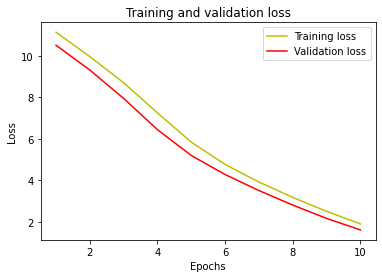

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

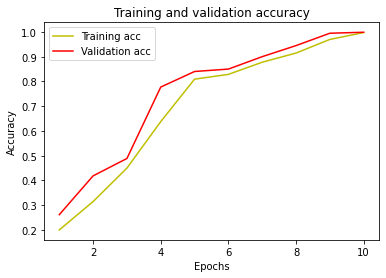

In [22]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()